In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Data Preprocessing

In [ ]:
df=pd.read_csv('/content/drive/MyDrive/Diamonds Prices2022.csv')#store df from csv

In [ ]:
df.shape

(53943, 11)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53943 entries, 0 to 53942
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  53943 non-null  int64  
 1   carat       53943 non-null  float64
 2   cut         53943 non-null  object 
 3   color       53943 non-null  object 
 4   clarity     53943 non-null  object 
 5   depth       53943 non-null  float64
 6   table       53943 non-null  float64
 7   price       53943 non-null  int64  
 8   x           53943 non-null  float64
 9   y           53943 non-null  float64
 10  z           53943 non-null  float64
dtypes: float64(6), int64(2), object(3)
memory usage: 4.5+ MB


In [ ]:
df.describe()

,Unnamed: 0,carat,depth,table,price,x,y,z
count,53943.000000,53943.000000,53943.000000,53943.000000,53943.000000,53943.000000,53943.000000,53943.000000
mean,26972.000000,0.797935,61.749322,57.457251,3932.734294,5.731158,5.734526,3.538730
std,15572.147122,0.473999,1.432626,2.234549,3989.338447,1.121730,1.142103,0.705679
min,1.000000,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,13486.500000,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,26972.000000,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,40457.500000,1.040000,62.500000,59.000000,5324.000000,6.540000,6.540000,4.040000
max,53943.000000,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


In [ ]:
print(df.cut.value_counts(),'\n',df.color.value_counts(),'\n',df.clarity.value_counts())#frequency of unique vals

cut
Ideal        21551
Premium      13793
Very Good    12083
Good          4906
Fair          1610
Name: count, dtype: int64 
 color
G    11292
E     9799
F     9543
H     8304
D     6775
I     5422
J     2808
Name: count, dtype: int64 
 clarity
SI1     13067
VS2     12259
SI2      9194
VS1      8171
VVS2     5066
VVS1     3655
IF       1790
I1        741
Name: count, dtype: int64


In [ ]:
df.head(10)

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
5,6,0.24,Very Good,J,VVS2,62.8,57.0,336,3.94,3.96,2.48
6,7,0.24,Very Good,I,VVS1,62.3,57.0,336,3.95,3.98,2.47
7,8,0.26,Very Good,H,SI1,61.9,55.0,337,4.07,4.11,2.53
8,9,0.22,Fair,E,VS2,65.1,61.0,337,3.87,3.78,2.49
9,10,0.23,Very Good,H,VS1,59.4,61.0,338,4.00,4.05,2.39


Exploratory Data Analysis(EDA)

<Axes: xlabel='price', ylabel='Count'>

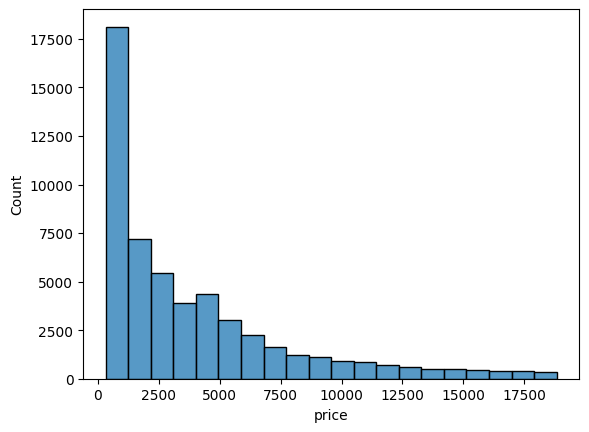

In [ ]:
sns.histplot(df['price'],bins=20)

<Axes: xlabel='carat', ylabel='Count'>

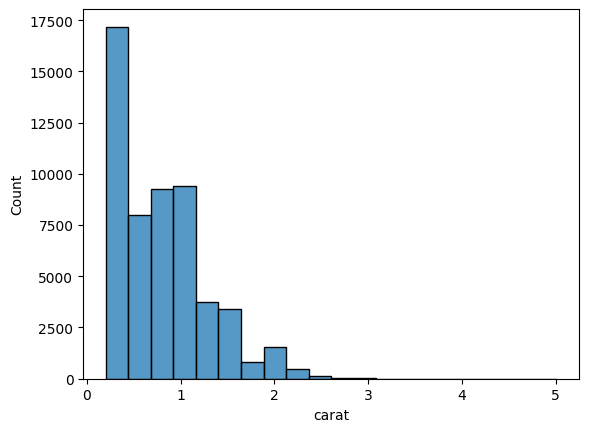

In [ ]:
sns.histplot(df['carat'],bins=20)

Most diamonds are less than 1-carat

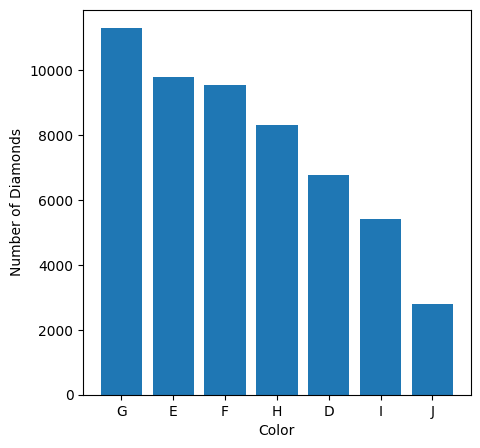

In [ ]:
plt.figure(figsize=(5,5))
plt.bar(df['color'].value_counts().index,df['color'].value_counts())
plt.ylabel("Number of Diamonds")
plt.xlabel("Color")
plt.show()

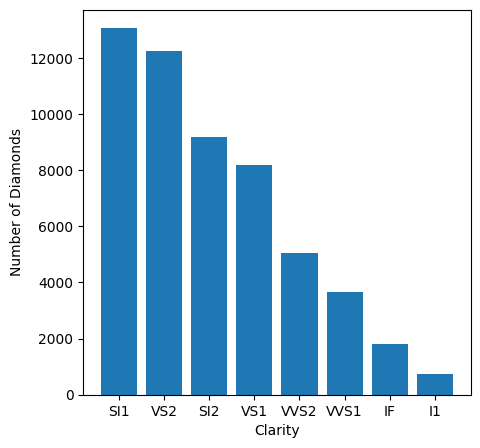

In [ ]:
plt.figure(figsize=(5,5))
plt.bar(df['clarity'].value_counts().index,df['clarity'].value_counts())
plt.ylabel("Number of Diamonds")
plt.xlabel("Clarity")
plt.show()

In [ ]:
df['cut']=df['cut'].map({'Fair':1,'Good':2,'Very Good':3,'Premium':4,'Ideal':5})
df['color']=df['color'].map({'J':1,'I':2,'H':3,'G':4,'F':5,'E':6,'D':7})
df['clarity']=df['clarity'].map({'I1':1,'SI2':2,'SI1':3,'VS2':4,'VS1':5,'VVS2':6,'VVS1':7,'IF':8})

In [ ]:
df.corr()

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
Unnamed: 0,1.000000,-0.377970,0.096462,0.095160,0.208538,-0.034896,-0.100764,-0.306875,-0.405405,-0.395809,-0.399185
carat,-0.377970,1.000000,-0.134964,-0.291439,-0.352833,0.028234,0.181602,0.921591,0.975093,0.951721,0.953387
cut,0.096462,-0.134964,1.000000,0.020506,0.189171,-0.218037,-0.433387,-0.053487,-0.125564,-0.121461,-0.149320
color,0.095160,-0.291439,0.020506,1.000000,-0.025646,-0.047316,-0.026457,-0.172520,-0.270281,-0.263579,-0.268226
clarity,0.208538,-0.352833,0.189171,-0.025646,1.000000,-0.067355,-0.160328,-0.146791,-0.371996,-0.358417,-0.366946
depth,-0.034896,0.028234,-0.218037,-0.047316,-0.067355,1.000000,-0.295798,-0.010630,-0.025289,-0.029340,0.094927
table,-0.100764,0.181602,-0.433387,-0.026457,-0.160328,-0.295798,1.000000,0.127118,0.195333,0.183750,0.150915
price,-0.306875,0.921591,-0.053487,-0.172520,-0.146791,-0.010630,0.127118,1.000000,0.884433,0.865419,0.861249
x,-0.405405,0.975093,-0.125564,-0.270281,-0.371996,-0.025289,0.195333,0.884433,1.000000,0.974701,0.970771
y,-0.395809,0.951721,-0.121461,-0.263579,-0.358417,-0.029340,0.183750,0.865419,0.974701,1.000000,0.952005


In [ ]:
if "Unnamed: 0" in df.columns:
    df = df.drop(columns=["Unnamed: 0"])

In [ ]:
from sklearn.model_selection import train_test_split
#y is price,x is rest of columns
x_test,x_train,y_test,y_train=train_test_split(df.drop('price',axis=1),df['price'],test_size=0.2,random_state=42)#test with 20% of data

In [ ]:
from sklearn.tree import DecisionTreeRegressor
dt=DecisionTreeRegressor()
dt

DecisionTreeRegressor()

In [ ]:
dt.fit(x_train,y_train)
dt.score(x_train,y_train)

0.9999992497692103

In [ ]:
dt_pred=dt.predict(x_test)

In [ ]:
from sklearn.ensemble import RandomForestRegressor
rf=RandomForestRegressor()
rf

RandomForestRegressor()

In [ ]:
rf.fit(x_train,y_train)
rf.score(x_train,y_train)

0.9969029130923593

In [ ]:
rf_pred=rf.predict(x_test)

In [ ]:
from sklearn.metrics import mean_squared_error,mean_absolute_error

Average error of the predicted values and actual values

<ipython-input-26-96d1ea69752e>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax=sns.distplot(y_test,hist=False,color='r',label='Actual Value')
<ipython-input-26-96d1ea69752e>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dt_pred,hist=False,color='b',label='Fitted Values',ax=ax)


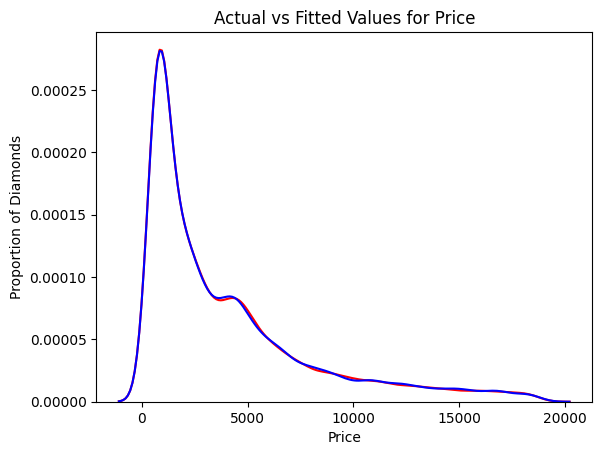

In [ ]:
ax=sns.distplot(y_test,hist=False,color='r',label='Actual Value')
sns.distplot(dt_pred,hist=False,color='b',label='Fitted Values',ax=ax)
plt.title('Actual vs Fitted Values for Price')
plt.xlabel('Price')
plt.ylabel('Proportion of Diamonds')
plt.show()

In [ ]:
print('Decision Tree Regressor RMSE:',np.sqrt(mean_squared_error(y_test,dt_pred)))
print('Decision Tree Regressor Accuracy:',dt.score(x_test,y_test))
print('Decision Tree Regressor MAE:',mean_absolute_error(y_test,dt_pred))

Decision Tree Regressor RMSE: 792.4200226965168
Decision Tree Regressor Accuracy: 0.9607271375316663
Decision Tree Regressor MAE: 406.9310724382444


<ipython-input-28-6804b87523b5>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax=sns.distplot(y_test,hist=False,color='r',label='Actual Value')
<ipython-input-28-6804b87523b5>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(rf_pred,hist=False,color='b',label='Fitted Values',ax=ax)


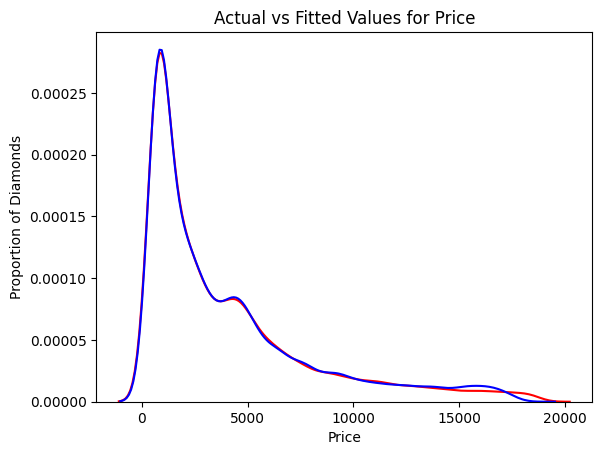

In [ ]:
ax=sns.distplot(y_test,hist=False,color='r',label='Actual Value')
sns.distplot(rf_pred,hist=False,color='b',label='Fitted Values',ax=ax)
plt.title('Actual vs Fitted Values for Price')
plt.xlabel('Price')
plt.ylabel('Proportion of Diamonds')
plt.show()

In [ ]:
print('Random Forest Regressor RMSE:',np.sqrt(mean_squared_error(y_test,rf_pred)))
print('Random Forest Regressor Accuracy:',rf.score(x_test,y_test))
print('Random Forest Regressor MAE:',mean_absolute_error(y_test,rf_pred))

Random Forest Regressor RMSE: 602.0750292107261
Random Forest Regressor Accuracy: 0.9773283615999425
Random Forest Regressor MAE: 300.4503434852367


In [ ]:
import pickle

with open('diamond_price_model.pkl', 'wb') as file:#convert py opbject to byte stream
    pickle.dump(rf, file)#save model into file

In [ ]:
from google.colab import files
files.download('diamond_price_model.pkl')#download saved model

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>